### Importing needed modules
Importing fastf1 API which enables us to access f1 data.
matplotlib package allows us to plot the graphs

In [1]:
import fastf1
from matplotlib import pyplot as plt

### Cache folder
By enabling cache folder, all the data will be stored in this folder. If data is already available in cache folder, data will be imported from here.
The data is stored in pkl format.

In [2]:
fastf1.Cache.enable_cache(r'C:\Users\harsh\jupyter\f1_data_analysis\cache')

### Loading session
Loading the session is the first thing to do to work with data.

In [3]:
session = fastf1.get_session(2023, "Bahrain", "Q")
session.load()

utils          INFO 	NumExpr defaulting to 8 threads.
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


### Loading car data
Using laps method in session, we get the car data.

In [4]:
#picking the fastest laps of the drivers using pick_fastest method
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()

In [5]:
#using get_car_data method, we can get the lap telemetry data.
ver_car_data = ver_lap.get_car_data()
per_car_data = per_lap.get_car_data()
ver_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-03-04 16:07:26.056,10575,296,8,100,False,12,car,0 days 00:00:00.295000,0 days 01:22:25.059000
1,2023-03-04 16:07:26.377,10695,298,8,100,False,12,car,0 days 00:00:00.616000,0 days 01:22:25.380000
2,2023-03-04 16:07:26.777,10759,302,8,100,False,12,car,0 days 00:00:01.016000,0 days 01:22:25.780000
3,2023-03-04 16:07:27.177,10853,305,8,100,False,12,car,0 days 00:00:01.416000,0 days 01:22:26.180000
4,2023-03-04 16:07:27.377,10909,307,8,100,False,12,car,0 days 00:00:01.616000,0 days 01:22:26.380000
...,...,...,...,...,...,...,...,...,...,...
313,2023-03-04 16:08:54.337,11154,279,7,100,False,12,car,0 days 00:01:28.576000,0 days 01:23:53.340000
314,2023-03-04 16:08:54.737,11280,284,7,100,False,12,car,0 days 00:01:28.976000,0 days 01:23:53.740000
315,2023-03-04 16:08:54.977,11373,288,7,100,False,12,car,0 days 00:01:29.216000,0 days 01:23:53.980000
316,2023-03-04 16:08:55.177,11478,290,7,100,False,12,car,0 days 00:01:29.416000,0 days 01:23:54.180000


In [6]:
# add_distance method will add the distance column to the telemetry data
ver_car_data = ver_lap.get_car_data().add_distance()
per_car_data = per_lap.get_car_data().add_distance()
ver_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-03-04 16:07:26.056,10575,296,8,100,False,12,car,0 days 00:00:00.295000,0 days 01:22:25.059000,24.255556
1,2023-03-04 16:07:26.377,10695,298,8,100,False,12,car,0 days 00:00:00.616000,0 days 01:22:25.380000,50.827222
2,2023-03-04 16:07:26.777,10759,302,8,100,False,12,car,0 days 00:00:01.016000,0 days 01:22:25.780000,84.382778
3,2023-03-04 16:07:27.177,10853,305,8,100,False,12,car,0 days 00:00:01.416000,0 days 01:22:26.180000,118.271667
4,2023-03-04 16:07:27.377,10909,307,8,100,False,12,car,0 days 00:00:01.616000,0 days 01:22:26.380000,135.327222
...,...,...,...,...,...,...,...,...,...,...,...
313,2023-03-04 16:08:54.337,11154,279,7,100,False,12,car,0 days 00:01:28.576000,0 days 01:23:53.340000,5275.855833
314,2023-03-04 16:08:54.737,11280,284,7,100,False,12,car,0 days 00:01:28.976000,0 days 01:23:53.740000,5307.411389
315,2023-03-04 16:08:54.977,11373,288,7,100,False,12,car,0 days 00:01:29.216000,0 days 01:23:53.980000,5326.611389
316,2023-03-04 16:08:55.177,11478,290,7,100,False,12,car,0 days 00:01:29.416000,0 days 01:23:54.180000,5342.722500


### Plotting speed traces
Speed traces can be plotted using matplotlib packages. 

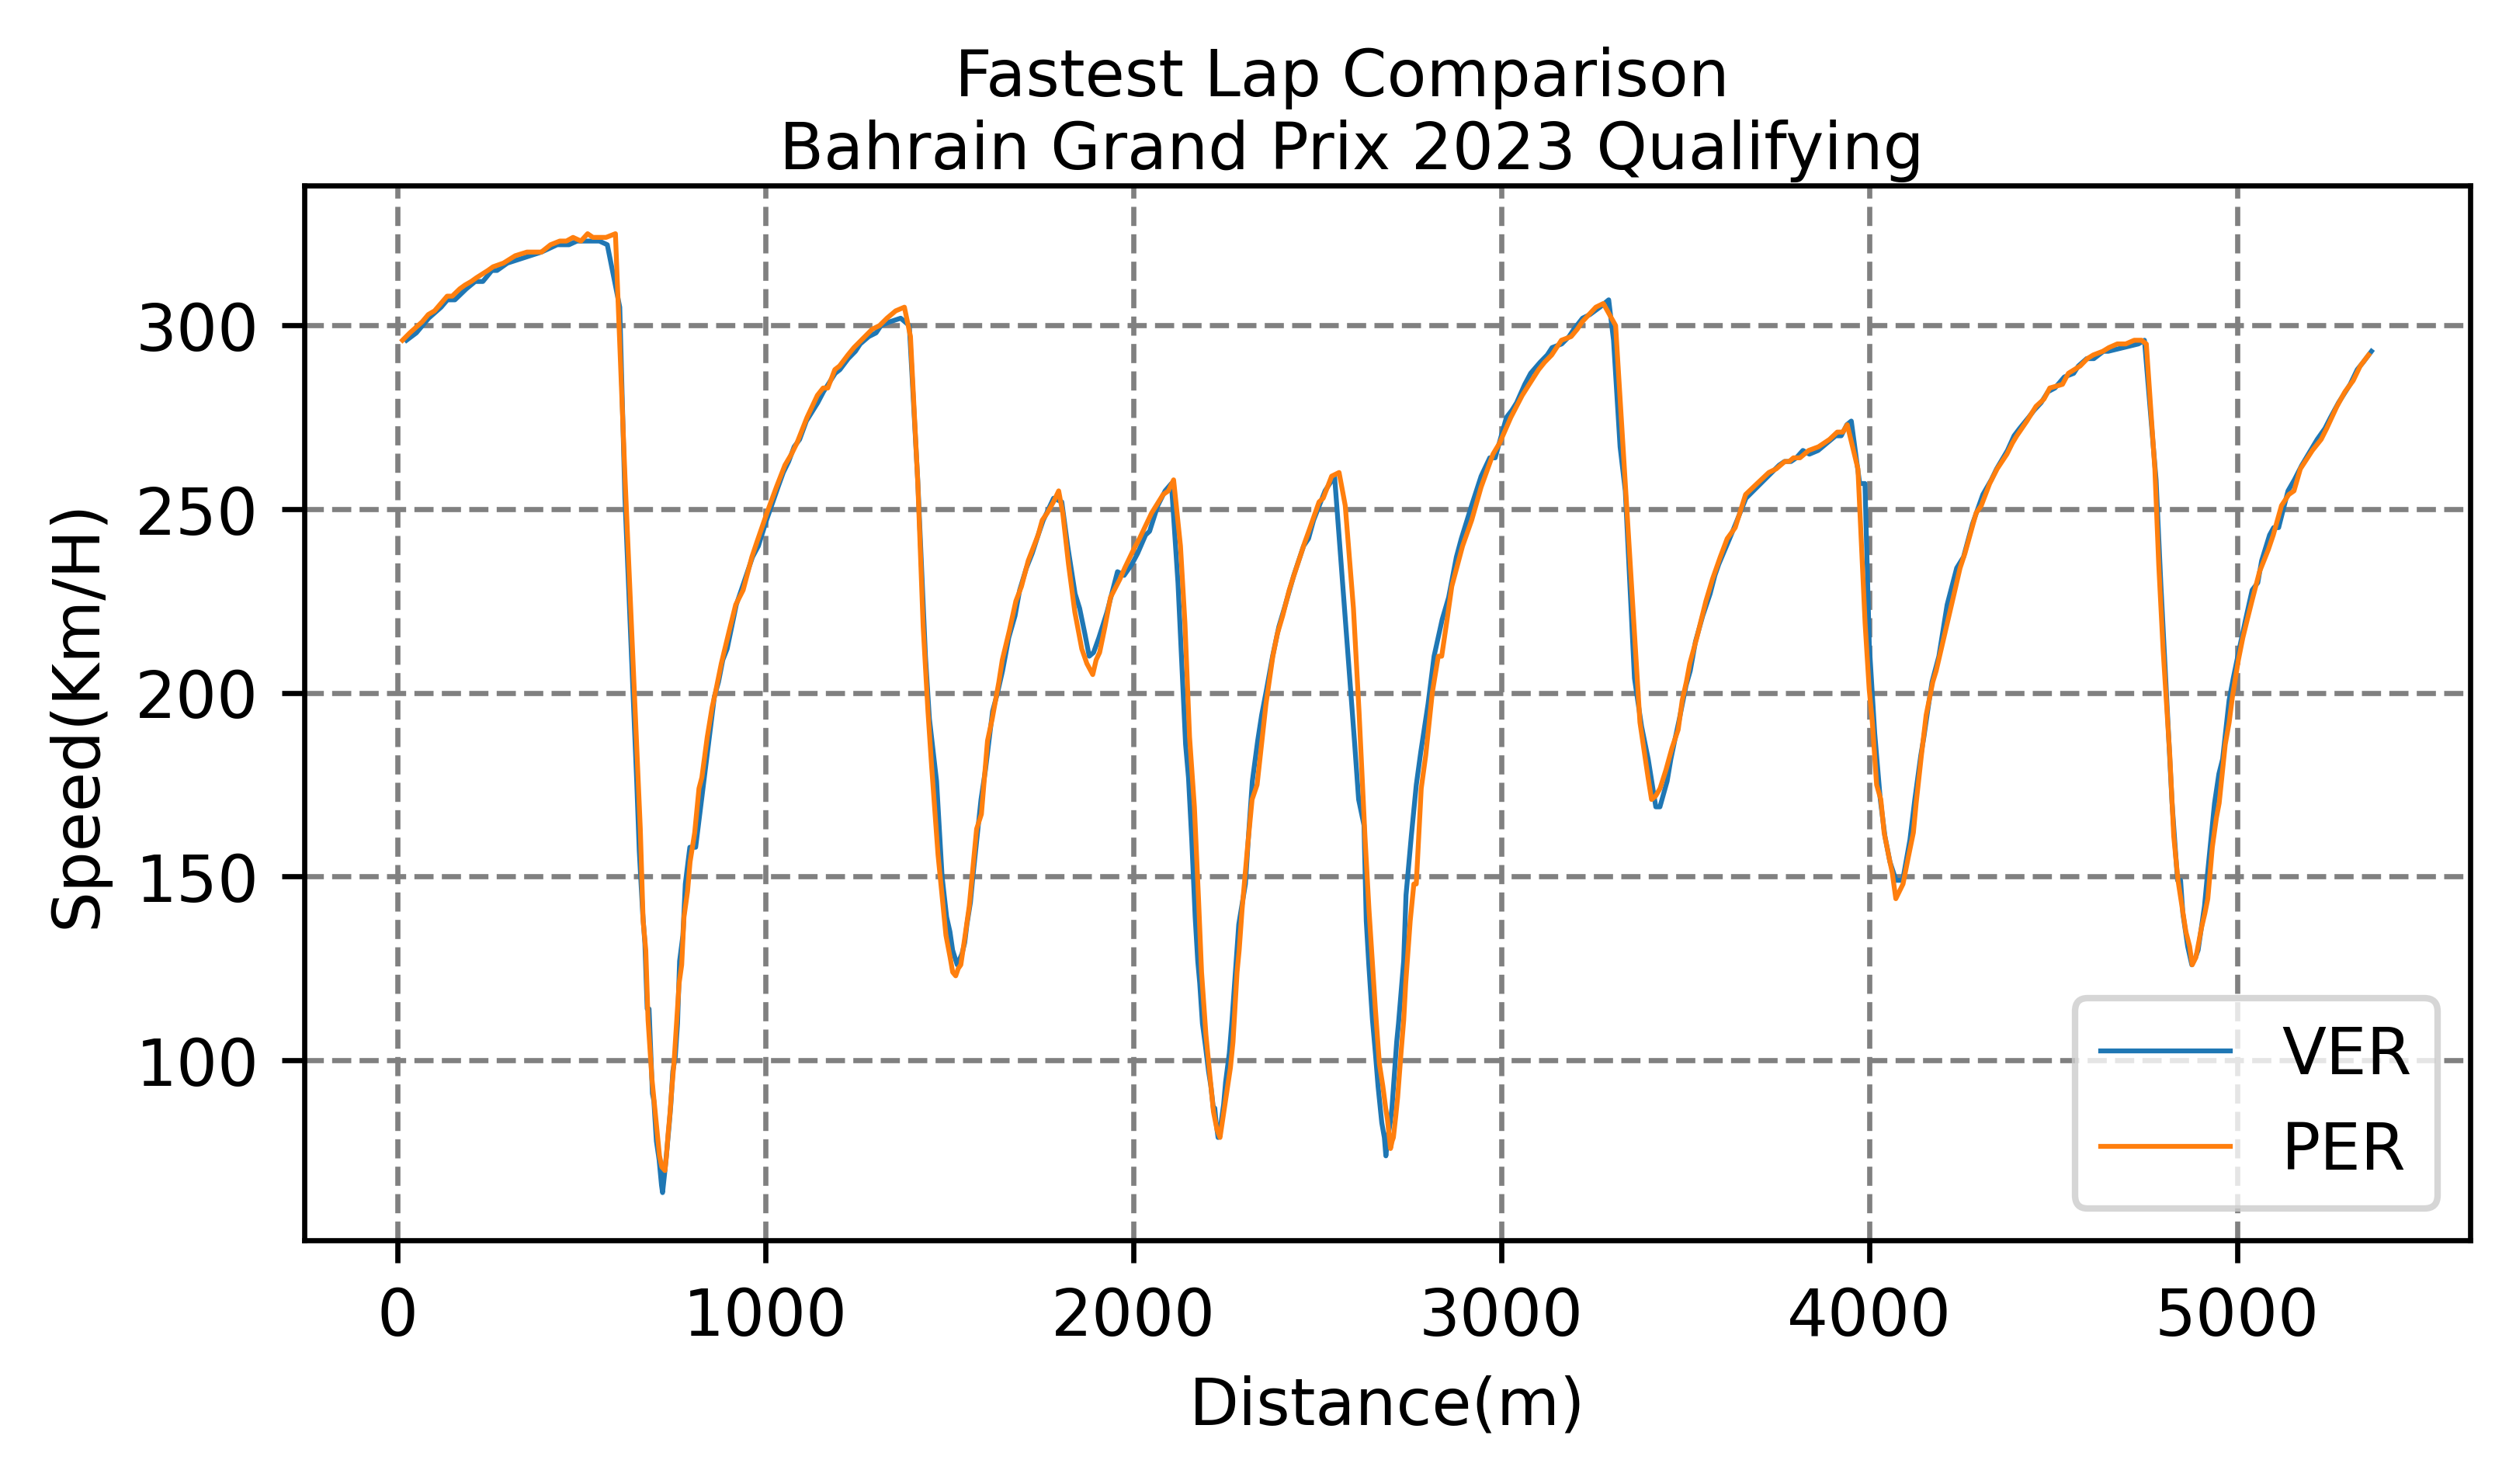

In [7]:
plt.figure(figsize=(6,3),dpi=600)
plt.plot(ver_car_data['Distance'],ver_car_data['Speed'],label='VER',linewidth=0.75)
plt.plot(per_car_data['Distance'],per_car_data['Speed'],label='PER',linewidth=0.75)
plt.ylabel("Speed(Km/H)")
plt.xlabel("Distance(m)")
plt.grid(which='major',color='grey',linestyle='--')
plt.grid(which='minor',color='grey',linestyle=':')
plt.suptitle(f"Fastest Lap Comparison \n"
             f"{session.event['EventName']} {session.event.year} Qualifying",fontsize=10)
plt.legend()
plt.show()